<a href="https://colab.research.google.com/github/chethankotian2005/INTERNSHIP/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project5 — Heart Disease Prediction



## Introduction

This notebook implements a full end-to-end project for **Heart Disease Prediction** following the Week 5 project structure:
1. Objective
2. Dataset
3. Preprocessing
4. Model Architecture
5. Training
6. Evaluation
7. Extensions
8. Tools




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Objective

Build an ANN (Artificial Neural Network) classifier to predict the presence (or risk) of heart disease given patient clinical attributes. Evaluate model performance using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC. Provide suggestions for extensions and deployment.



## Dataset


In [ ]:
# Load dataset
import os
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Datasets/heart.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"{DATA_PATH} not found.")

df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



## Preprocessing

Steps implemented:
- Handle missing values (drop or impute).
- Convert categorical features to numeric (one-hot encoding where appropriate).
- Feature scaling (StandardScaler).
- Train-test split with stratification.


In [ ]:
# Preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copy dataframe to avoid modifying original accidentally
data = df.copy()

# Basic info
print(data.info())
print("\nMissing values per column:\n", data.isna().sum())

# If 'target' column exists
if 'target' not in data.columns:
    raise KeyError("Expected a 'target' column (0/1). Rename your label column to 'target' or edit this cell.")

# Example: treat categorical columns that commonly appear in heart datasets
# (adjust if your dataset differs)
categorical_cols = []
for col in ['cp', 'restecg', 'slope', 'thal']:
    if col in data.columns:
        categorical_cols.append(col)

# One-hot encode categorical columns (if any)
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0



## Model Architecture

A simple dense neural network with:
- Input layer matching number of features
- Dense(64) -> ReLU -> Dropout(0.3)
- Dense(32) -> ReLU -> Dropout(0.2)
- Output Dense(1) -> Sigmoid

Regularization (L2) is applied to Dense layers to reduce overfitting.


In [ ]:
# Build the model (Keras)
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models

input_dim = X_train.shape[1]

def build_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_model(input_dim)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(name='auc')])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)


## Training

- Optimizer: Adam
- Loss: Binary Crossentropy
- Metrics: accuracy, precision, recall, AUC
- Epochs: 100 (with EarlyStopping)
- Batch size: 32


In [ ]:
# Training the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

Epoch 1/100
21/21 - 2s - 109ms/step - accuracy: 0.5762 - auc: 0.6292 - loss: 0.7498 - precision: 0.5966 - recall: 0.5254 - val_accuracy: 0.7256 - val_auc: 0.8062 - val_loss: 0.6207 - val_precision: 0.7253 - val_recall: 0.7674
Epoch 2/100
21/21 - 0s - 6ms/step - accuracy: 0.7729 - auc: 0.8436 - loss: 0.5815 - precision: 0.7719 - recall: 0.7881 - val_accuracy: 0.7927 - val_auc: 0.8605 - val_loss: 0.5390 - val_precision: 0.7826 - val_recall: 0.8372
Epoch 3/100
21/21 - 0s - 6ms/step - accuracy: 0.8262 - auc: 0.8755 - loss: 0.5236 - precision: 0.8078 - recall: 0.8657 - val_accuracy: 0.8171 - val_auc: 0.8907 - val_loss: 0.4870 - val_precision: 0.8182 - val_recall: 0.8372
Epoch 4/100
21/21 - 0s - 6ms/step - accuracy: 0.8095 - auc: 0.8876 - loss: 0.4993 - precision: 0.7885 - recall: 0.8567 - val_accuracy: 0.8232 - val_auc: 0.9064 - val_loss: 0.4583 - val_precision: 0.8202 - val_recall: 0.8488
Epoch 5/100
21/21 - 0s - 6ms/step - accuracy: 0.8338 - auc: 0.9105 - loss: 0.4521 - precision: 0.8156 


## Evaluation

Compute:
- Accuracy, Precision, Recall, F1-score
- Confusion Matrix
- ROC-AUC
- Plot training history


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Classification Report:
               precision    recall  f1-score   support

           0     0.9899    0.9800    0.9849       100
           1     0.9811    0.9905    0.9858       105

    accuracy                         0.9854       205
   macro avg     0.9855    0.9852    0.9854       205
weighted avg     0.9854    0.9854    0.9854       205

Confusion Matrix:
 [[ 98   2]
 [  1 104]]
ROC AUC: 0.9996190476190476


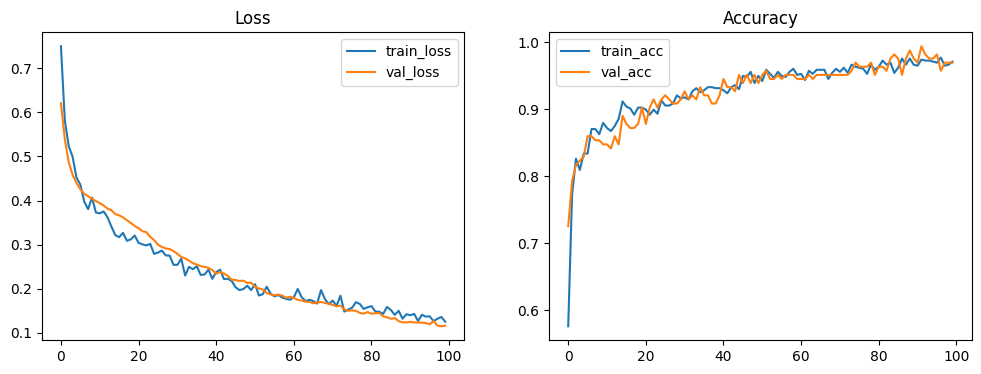

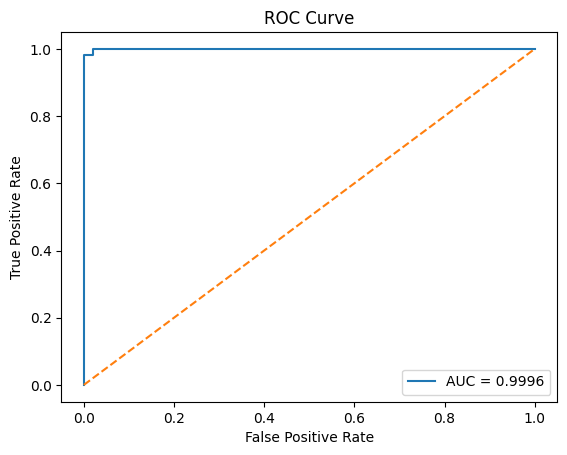

In [ ]:
# Evaluation
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.4f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Tools / Libraries

- Python, Pandas, NumPy, Scikit-learn
- TensorFlow / Keras
- Matplotlib (for plots)
- Optionally: imbalanced-learn (SMOTE), SHAP, Flask/FastAPI, Docker



## Conclusion

This notebook follows the Week 5 project structure and provides a complete pipeline for heart disease prediction using an ANN. It includes data loading, preprocessing, model building, evaluation, and suggested extensions. Place your dataset in `heart.csv` and run the notebook cells in order to reproduce results and iterate further.
